<a href="https://colab.research.google.com/github/melissadebie/TM10007_PROJECT/blob/master/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template
Janne Luijten, Mathilde Scholtes, Imane Ihaddouchen and Melissa de Bie

In [1]:
# Run this to use from colab environment
!pip install missingpy -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

     |████████████████████████████████| 51kB 2.0MB/s 


## Data loading

In [2]:
# Data loading function
from hn.load_data import load_data

# General packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn import datasets as ds
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection 
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from time import time

# Imputing
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from missingpy import KNNImputer
from missingpy import MissForest
 
# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV, RidgeClassifier
from yellowbrick.regressor import AlphaSelection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile, GenericUnivariateSelect, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
 

## Load and print data

In [3]:
# Load Data
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

y = data['label']

# Binarize the data for tumor stages
y_bin = []
for i in y:
  if i == 'T12':
    i=0
    y_bin.append(i)
  else:
      i=1
      y_bin.append(i)
y_bin = np.transpose(y_bin)


The number of samples: 113
The number of columns: 160


## Data Cleaning - Removing outliers

In [0]:
#Settings to view more of the df
pd.options.display.max_rows = 5
pd.options.display.max_columns = 5

#View original data
# print('Original dataframe:', data)

#Drop labels-column to apply outlier removal
data_no_labels = data.copy()
data_no_labels.drop(columns=['label'], axis=1, inplace=True)

#Turn outliers into NaN (below 1% and above 99%)
for column in data_no_labels.columns:
  data_no_labels.loc[(data_no_labels[column] <= data_no_labels[column].quantile(0.01)) | (data_no_labels[column] >= data_no_labels[column].quantile(0.99)), column] = np.nan
data_no_labels_no_outliers = data_no_labels.copy()

# print('Dataframe without labels and without outliers:', data_no_labels_no_outliers)

#Add labels-column to df without outliers
data_no_labels_no_outliers['label'] = y
data_no_outliers = data_no_labels_no_outliers.copy()

# print('Dataframe without outliers:', data_no_outliers)

## Cleaning data - Removing missing data

In [5]:
#Clearing of missing data
number_of_columns = len(data.columns)
number_of_rows = len(data.index)

#Set threshold for removing columns (10% missing data)
threshold_columns = 0.1*number_of_rows
print('Threshold NaN columns:', threshold_columns) # if there are more Nan's in a column than the threshold, they are removed

#Replace all missing values (0.0) with NaN
data_nans = data_no_outliers.replace(to_replace=0.0, value=np.nan)

#Loop over every column and remove if too many NaN values
for column in data_nans.columns:
    sum_nans = data_nans[column].isna().sum()
    if sum_nans >= threshold_columns:
        del data_nans[column]

#Printing new df
# print('Data_nans after removing columns:', data_nans)

#Set threshold for removing rows (30% missing data)
number_of_columns_after_column_del = len(data_nans.columns)
threshold_rows = 0.3*number_of_columns_after_column_del
print('Threshold NaN rows:', threshold_rows)

#Loop over every row and remove if too many NaN values
for index, row in data_nans.iterrows():
    sum_nans = row.isna().sum()
    if sum_nans >= threshold_rows:
        data_nans.drop(index, inplace=True)

#Printing new df
# print('Data_nans after removing columns AND rows:', data_nans)

#Calculate remaining NaN values (total, per column, per row) and print
de_som = data_nans.isnull().sum().sum()
print('Remaining nans:', de_som)

nans_per_column = data_nans.isnull().sum(axis = 0)
nans_per_column_nonzero = nans_per_column[nans_per_column>0]
print('NaNs per column nonzero:\n',nans_per_column_nonzero, len(nans_per_column_nonzero))

nans_per_row = data_nans.isnull().sum(axis = 1)
nans_per_row_nonzero = nans_per_row[nans_per_row>0]
print('NaNs per row nonzero:\n',nans_per_row_nonzero, len(nans_per_row_nonzero))

data_nans_no_labels = data_nans.copy()
data_nans_no_labels.drop(columns=['label'], axis=1, inplace=True)

Threshold NaN columns: 11.3
Threshold NaN rows: 40.8
Remaining nans: 565
NaNs per column nonzero:
 hf_energy            4
hf_entropy           4
                    ..
tf_LBP_std_R3_P12    4
tf_LBP_std_R8_P24    4
Length: 135, dtype: int64 135
NaNs per row nonzero:
 ID
0_HN1006_0    1
0_HN1026_0    4
             ..
0_HN1954_0    3
0_HN1987_0    2
Length: 89, dtype: int64 89


## Data imputation
Imputating data on NaN locations

In [6]:
#Save the indices of rows and columns
row_indices = data_nans_no_labels.index.tolist()
column_indices = data_nans_no_labels.columns.tolist()

#Simple imputer
sim_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
sim_imputer = sim_imputer.fit(data_nans_no_labels)
data_sim_imp_array = sim_imputer.transform(data_nans_no_labels)
data_sim_imp_no_labels = pd.DataFrame(data=data_sim_imp_array, index=row_indices, columns=column_indices)
# print('Data df after simple imp:\n', data_sim_imp_no_labels)

#Iterative imputer
def imputed_data_it(data_nans_no_labels): 
  it_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  it_imputer = it_imputer.fit(data_nans_no_labels)
  data_it_imp_array = it_imputer.transform(data_nans_no_labels)
  data_it_imp_no_labels = pd.DataFrame(data=data_it_imp_array, index=row_indices, columns=column_indices)
  # print('Data after iterative imp:\n', data_it_imp_no_labels)
  return data_it_imp_no_labels

data_it_imp_no_labels = imputed_data_it(data_nans_no_labels)

#MissingPy  KNN imputer
def imputed_data(data_nans_no_labels): 
  kNN_imputer = KNNImputer(missing_values=np.nan, weights='distance')
  kNN_imputer = kNN_imputer.fit(data_nans_no_labels)
  data_kNN_imp_array = kNN_imputer.transform(data_nans_no_labels)
  data_kNN_imp_no_labels = pd.DataFrame(data=data_kNN_imp_array, index=row_indices, columns=column_indices)
  # print('Data after kNN imp:\n', data_kNN_imp_no_labels)
  return data_kNN_imp_no_labels

data_kNN_imp_no_labels = imputed_data(data_nans_no_labels)

#MissingPy Random Forest imputer, takes a lot of time to run
# RF_imputer = MissForest(missing_values=np.nan)
# RF_imputer = RF_imputer.fit(data_nans_no_labels)
# data_RF_imp_array = RF_imputer.transform(data_nans_no_labels)
# data_RF_imp_no_labels = pd.DataFrame(data=data_RF_imp_array, index=row_indices, columns=column_indices)
# print('Data after RF imp:\n', data_RF_imp_no_labels)

#Adding labels back to df's
data_sim_imp_no_labels['label'] = y
data_sim_imp = data_sim_imp_no_labels.copy()

data_it_imp_no_labels['label'] = y
data_it_imp = data_it_imp_no_labels.copy()

data_kNN_imp_no_labels['label'] = y
data_kNN_imp = data_kNN_imp_no_labels.copy()

# SAME
# data_RF_imp_no_labels['label'] = y
# data_RF_imp = data_RF_imp_no_labels.copy()

/usr/local/lib/python3.6/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.6/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.6/dist-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


## Try out different cleaned and imputed datasets

In [0]:
# data = data_sim_imp
# data = data_it_imp
data = data_kNN_imp 
# data = data_RF_imp

y = y_bin

# Data without label
data_without_label = data.drop(columns=['label'])

## Split data 
Split in test set and train set, 20/80 ratio. Stratify at y = data['label'] so the two different tumorstages are divided fairly amongst the test and train set.

In [8]:
def splits_data(data,y):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.2, train_size=0.8, random_state=0, stratify=y)
  # Remove column 'label' from train and test set
  print(X_train)
  X_train_no_label = X_train.drop(columns=['label'])
  X_test_no_label = X_test.drop(columns=['label'])

  # The column 'label' of the train and test data 
  train_labels = X_train['label']
  test_labels = X_test['label']
  return X_train, X_test, y_train, y_test, X_train_no_label, X_test_no_label, train_labels, test_labels

X_train, X_test, y_train, y_test, X_train_no_label, X_test_no_label, train_labels, test_labels = splits_data(data,y)

               hf_energy  hf_entropy  ...  tf_LBP_std_R8_P24  label
0_HN1679_0    832.321585    3.737777  ...           7.182751    T12
0_HN1486_0  12683.086332    2.887517  ...           9.148610    T34
...                  ...         ...  ...                ...    ...
0_HN1429_0  29530.296343    2.032218  ...           9.228597    T12
0_HN1465_0   6416.462243    2.595470  ...           8.591904    T34

[90 rows x 136 columns]


## Scale data
Scale the data with different scalers

In [0]:
#standard_scaler = StandardScaler()
#Xtr_s = standard_scaler.fit_transform(X_train_no_label)
#Xte_s = standard_scaler.transform(X_test_no_label)

# Saving indices of rows and columns
train_row_indices = X_train_no_label.index.tolist()
train_column_indices = X_train_no_label.columns.tolist()

test_row_indices = X_test_no_label.index.tolist()
test_column_indices = X_test_no_label.columns.tolist()

# Scaled data as array (without column 'label')
def scaled_data(X_train_no_label, X_test_no_label):
  robust_scaler = RobustScaler()
  Xtr_r_array = robust_scaler.fit_transform(X_train_no_label)
  Xte_r_array = robust_scaler.transform(X_test_no_label)
  # Scaled data as dataframe (without column 'label')
  Xtr_r = pd.DataFrame(data=Xtr_r_array, index=train_row_indices, columns=train_column_indices)
  Xte_r = pd.DataFrame(data=Xte_r_array, index=test_row_indices, columns=test_column_indices)
  # Scaled data as dataframe (with column 'label')
  Xtr_r_labels = Xtr_r.copy()
  # Xtr_r_labels['label'] = train_labels
  Xte_r_labels = Xte_r.copy()
  # Xte_r_labels['label'] = test_labels
  return Xtr_r, Xte_r 

Xtr_r, Xte_r = scaled_data(X_train_no_label,X_test_no_label)

## PCA

[0.72477447 0.27522553]
Explained variation per principal component: [0.29720085 0.11285892]


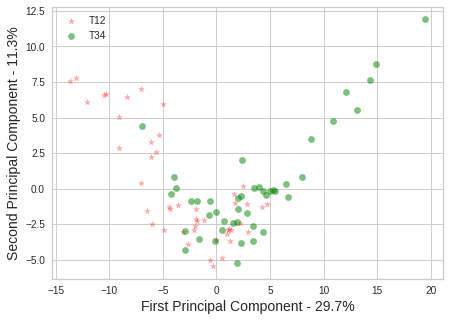

<Figure size 576x396 with 0 Axes>

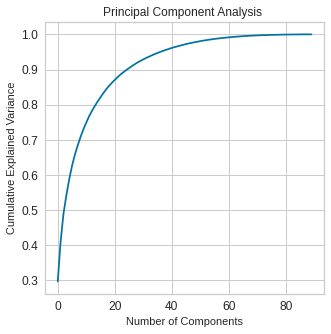

In [10]:
#PCA PART 1 
pca=PCA(n_components=2) 
pca.fit(Xtr_r) 
X_pca=pca.transform(Xtr_r) 

#variance ratio
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

# The amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)) 

# Principal component 1 holds 30,6% of the information, while principal component 2 only holds 11,3% of the information, so when projecting 160 dimensional data to 2 dimensional data, 59% information was lost.

#Plot
Xax=X_pca[:,0]
Yax=X_pca[:,1]

cdict={0:'red',1:'green'}
labl={0:'T12',1:'T34'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(y_train):
 ix=np.where(y_train==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component - {0:.3}%".format(pca.explained_variance_ratio_[0]*100),  fontsize=14)
plt.ylabel("Second Principal Component - {0:.3}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.legend()
plt.show()

# PCA PART 2 - A FUNCTION FOR CALCULATING PCA 
def pca(Xtr_r, Xte_r):

    # This function trains and plots the Principal Component Analysis
    pca = PCA().fit(Xtr_r)
    variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure()
    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.plot(variance)
    #plt.grid(b=None)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance') # for each component
    plt.title('Principal Component Analysis ')
    plt.show()

    # We are applying PCA to keep 98% of the variance
    n_components = np.where(variance>0.98)[0][0]
    pca = PCA(n_components=n_components)
    PrincipalComponents = pca.fit_transform(Xtr_r)

    # Transform data using PCA
    Xtr_pca = pca.transform(Xtr_r)
    Xte_pca = pca.transform(Xte_r)

    # Return transformed train- and testdata
    return Xtr_pca, Xte_pca

Xtr_pca, Xte_pca = pca(Xtr_r, Xte_r)

Xtr_pca=pd.DataFrame(Xtr_pca)
Xte_pca=pd.DataFrame(Xte_pca)

## Feature selection methods
Multiple feature selection methods will be applied and analyzed, and the performance is measured through the accuracy. The most suitable method, so the method with the best performance on the training set is used.

## RFECV Feature selection


Score from training data: 0.9555555555555556
Score from test data: 0.8260869565217391


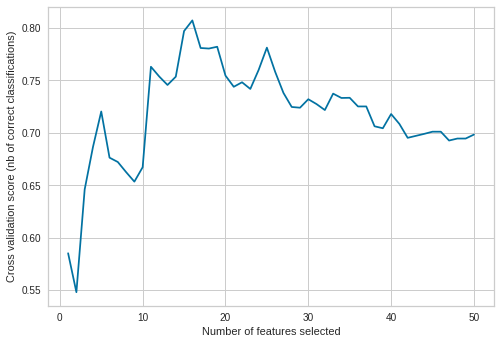

Num Features: 16
          1         18  ...        22        19
0   3.281494 -0.140854  ...  1.459609  0.912235
1  -3.561883  0.291083  ...  0.413793 -0.529721
..       ...       ...  ...       ...       ...
88 -1.296048  0.310698  ... -1.126317 -1.615535
89 -0.392104 -0.061017  ... -0.538031 -1.712235

[90 rows x 16 columns]


In [11]:
# Function of RFECV feature selection method
def rfecv (Xtr_pca, y_train, Xte_pca, y_test):
  svc = svm.SVC(kernel='linear')
  rfecv = feature_selection.RFECV(estimator=svc, step=1, scoring='roc_auc', cv=model_selection.StratifiedKFold(4))
  fitted_rfecv = rfecv.fit(Xtr_pca, y_train)
  print(f'Score from training data:',rfecv.score(Xtr_pca,y_train))
  print(f'Score from test data:',rfecv.score(Xte_pca,y_test))
  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()
  print("Num Features: %d" % rfecv.n_features_)
  df_rfecv=fitted_rfecv.ranking_[0:rfecv.n_features_]
  df_rfecv_train=Xtr_pca[df_rfecv]
  df_rfecv_test=Xte_pca[df_rfecv]
  print(df_rfecv_train)
  return df_rfecv_train, df_rfecv_test

df_rfecv_train, df_rfecv_test = rfecv(Xtr_pca,y_train, Xte_pca, y_test)


# Lasso Regression feature selection

In [12]:
# Function of Lasso feature selection method
def lasso2_featureselection(Xtr_pca, y_train, Xte_pca, y_test):
  selector = SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), threshold='median')
  selector.fit(Xtr_pca, y_train)
  n_original = Xte_pca.shape[1]
  Xtr_pca_lasso = selector.transform(Xtr_pca)
  Xte_pca_lasso = selector.transform(Xte_pca)
  n_selected = Xtr_pca_lasso.shape[1]
  print(f"Selected {n_selected} from {n_original} features.")

  # Fit the LDA on selected features
  clf = LDA()
  clf.fit(Xtr_pca_lasso, y_train)
  y_score = clf.predict_proba(Xte_pca_lasso)
  # plot_roc_curve(y_score, y_test)

  df_lasso_2_train=pd.DataFrame(Xtr_pca_lasso)
  df_lasso_2_test=pd.DataFrame(Xte_pca_lasso)
  return df_lasso_2_train, df_lasso_2_test

df_lasso_2_train, df_lasso_2_test = lasso2_featureselection(Xtr_pca, y_train, Xte_pca, y_test)


Selected 25 from 50 features.


# Univariate Feature Selection

Shape of train data: (90, 50)
Shape of test data:  (23, 50)
                  Specs      Score
0             hf_energy  35.560606
18  sf_convexity_std_2D   9.148354
..                  ...        ...
19       sf_cvar_avg_2D   1.295821
13           of_theta_y   1.145411

[14 rows x 2 columns]


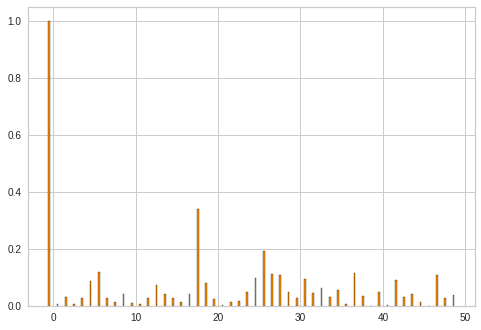

In [13]:
# Function of Univariate feature selection method
def univariate_featureselection(Xtr_pca, y_train, Xte_pca, y_test):
  X_indices = np.arange(Xtr_pca.shape[-1])

  # The 92 best features are determined (outcome from RFECV)
  selector = SelectKBest(score_func=f_classif, k='all')
  selector.fit(Xtr_pca, y_train)

  # Determine and print the new dataframes
  selector_train=selector.transform(Xtr_pca)
  selector_test=selector.transform(Xte_pca)
  print(f'Shape of train data:',selector_train.shape)
  print(f'Shape of test data: ',(selector_test.shape))
  # print(selector.score_func(Xtr_r,y_train))
  # print(selector.score_func(Xte_r,y_test))

  scores = -np.log10(selector.pvalues_)
  scores /= scores.max()
  dfscores = pd.DataFrame(selector.scores_)
  dfcolumns = pd.DataFrame(X_train_no_label.columns)

  # Concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(14,'Score'))

  plt.bar(X_indices - .45, scores, width=.2,
          label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
          edgecolor='black')
  df_univariate_train=pd.DataFrame(selector_train)
  df_univariate_test=pd.DataFrame(selector_test)
  return df_univariate_train, df_univariate_test

df_univariate_train, df_univariate_test = univariate_featureselection(Xtr_pca, y_train, Xte_pca, y_test)


# Random Forest Feature Selection

Best Hyperparameters:
Best number of trees in the forest: 100
Best maximum depth of tree: 10
Best minimum number of samples required to split an internal node: 12
Best minimum number of samples required to be at a leaf node: 1
Whether bootstrap is used when building trees: True
Best class weights: {0: 1, 1: 1}
Feature ranking:
1. feature 0 (0.126590)
2. feature 18 (0.089999)
3. feature 26 (0.041937)
4. feature 10 (0.035519)
5. feature 30 (0.034765)
6. feature 14 (0.033370)
7. feature 27 (0.031054)
8. feature 31 (0.028624)
9. feature 6 (0.026890)
10. feature 32 (0.024640)
11. feature 23 (0.024514)
12. feature 28 (0.021151)
13. feature 44 (0.020152)
14. feature 36 (0.020120)
15. feature 46 (0.019530)
16. feature 33 (0.019322)
17. feature 25 (0.019069)
18. feature 37 (0.017900)
19. feature 1 (0.017696)
20. feature 20 (0.017403)
21. feature 47 (0.017071)
22. feature 24 (0.015816)
23. feature 49 (0.015788)
24. feature 3 (0.015548)
25. feature 2 (0.015187)
[0, 18, 26, 10, 30, 14, 27, 31, 6, 

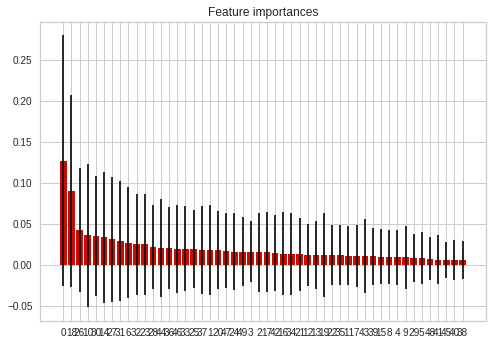

Accuracy score of Random Forest feature selection method on train data: 1.0
Accuracy score of Random Forest feature selection method on  on test data: 0.8260869565217391


In [14]:
# Function of Random Forest feature selection method with best hyperparameters
def randomforest_featureselection(Xtr_pca, y_train, Xte_pca, y_test):
  # n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, class_weight,
  # Hyperparameters
  n_estimators = [10, 30, 50, 100, 300]     
  max_depth = [5, 10, 15, 20, 30, 40]                
  min_samples_split = [7, 10, 12, 20, 30, 40]       
  min_samples_leaf = [1, 5, 10, 15, 20]              
  bootstrap = [True, False]
  class_weight = [{0: 1, 1: 0.001}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 100}]

  # Convert to dictionary
  hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, 
                             min_samples_split=min_samples_split, 
                             min_samples_leaf=min_samples_leaf, 
                             bootstrap=bootstrap, class_weight=class_weight)

  # Random Forest Classifier
  forest = RandomForestClassifier()
  forest.fit(Xtr_pca, y_train)

  # Create new object
  forest_2 = RandomForestClassifier()

  # Use RandomizedSearch
  clf = RandomizedSearchCV(forest_2, hyperparameters, cv=10)

  # Fit the model
  best_model = clf.fit(Xtr_pca, y_train)

  # Determine best parameters
  best_n_estimators = best_model.best_estimator_.get_params()['n_estimators']
  best_max_depth = best_model.best_estimator_.get_params()['max_depth']
  best_min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
  best_min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']
  best_bootstrap = best_model.best_estimator_.get_params()['bootstrap']
  best_class_weight = best_model.best_estimator_.get_params()['class_weight']

  # Print best hyperparameters
  print('Best Hyperparameters:')
  print('Best number of trees in the forest:', best_n_estimators)
  print('Best maximum depth of tree:', best_max_depth)
  print('Best minimum number of samples required to split an internal node:', best_min_samples_split)
  print('Best minimum number of samples required to be at a leaf node:', best_min_samples_leaf)
  print('Whether bootstrap is used when building trees:', best_bootstrap)
  print('Best class weights:', best_class_weight)
  
  # The feature selection with the best hyperparameters starts here
  forest = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, 
                                  min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                  bootstrap=best_bootstrap, class_weight=best_class_weight)
  forest.fit(Xtr_pca,y_train) 
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]
  train_score_rf_fs = forest.score(Xtr_pca,y_train)
  test_score_rf_fs = forest.score(Xte_pca,y_test)
  
  # Print the feature ranking
  print("Feature ranking:")
  df_rf =[]
  for f in range(25):
      print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
      df_rf.append(indices[f])

  print(df_rf)
  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(Xtr_pca.shape[1]), importances[indices],
         color="r", yerr=std[indices], align="center")
  plt.xticks(range(Xtr_pca.shape[1]), indices)
  # plt.xlim([-1, Xtr_r.shape[1]])
  plt.show()
  df_rf_train=Xtr_pca[df_rf]
  df_rf_test=Xte_pca[df_rf]

  # Accuracy
  print(f'Accuracy score of Random Forest feature selection method on train data:', train_score_rf_fs)
  print(f'Accuracy score of Random Forest feature selection method on  on test data:', test_score_rf_fs)
  return df_rf_train, df_rf_test

df_rf_train, df_rf_test = randomforest_featureselection(Xtr_pca, y_train, Xte_pca, y_test)


# Classifiers

SVM, RF, K-NN classifiers will be used








## Support Vector Machine classifier

In [15]:
# Function of SVM Classifier with best hyperparameters
def svm_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test):
  
  # Hyperparameters that we want to tune 
  C = [0.01, 0.5, 1.0]
  kernel = ['linear', 'rbf', 'poly']
  degree = list(range(5))
  coef0 = [0.01, 0.5, 1, 2, 3]
  gamma = [0.1, 1, 10, 100]

  # Convert to dictionary
  hyperparameters = dict(C=C, kernel=kernel, degree=degree, 
                             coef0=coef0, gamma=gamma) 
                           
  # SVC 
  svc = SVC()

  # Use RandomizedSearch
  clf = RandomizedSearchCV(svc, hyperparameters, cv=10)

  # Fit the model
  best_model_svm = clf.fit(df_lasso_2_train, y_train)

  # Determine best parameters
  best_C = best_model_svm.best_estimator_.get_params()['C']
  best_kernel = best_model_svm.best_estimator_.get_params()['kernel']
  best_degree = best_model_svm.best_estimator_.get_params()['degree']
  best_coef0 = best_model_svm.best_estimator_.get_params()['coef0']
  best_gamma = best_model_svm.best_estimator_.get_params()['gamma']

  # Print best hyperparameters
  print('Hyperparameters optimized using RandomizedSearchCV for SVM-classifier:')
  print('Best C (regularization parameter):', best_C)
  print('Best kernel:', best_kernel)
  print('Best of polynomial kernel (if used):', best_degree)
  print('Best coef0 (only in poly or sigmoid):', best_coef0)
  print('Best gamma (kernel coefficient for rbf, poly or sigmoid) bootstrap is used when building trees:', best_gamma)

  # The classification with the best hyperparameters starts here
  clf_svm = SVC(C=best_C, kernel=best_kernel, degree=best_degree, 
            coef0=best_coef0, gamma=best_gamma)
  clf_svm.fit(df_lasso_2_train,y_train)
  train_score_svm = clf_svm.score(df_lasso_2_train,y_train)
  test_score_svm = clf_svm.score(df_lasso_2_test,y_test)

  # Accuracy
  print(f'Accuracy score of SVM Classifier on train data:', train_score_svm)
  print(f'Accuracy score of SVM Classifier on test data:', test_score_svm)
  return clf_svm, train_score_svm, test_score_svm

clf_svm, train_score_svm, test_score_svm = svm_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test)

Hyperparameters optimized using RandomizedSearchCV for SVM-classifier:
Best C (regularization parameter): 0.01
Best kernel: poly
Best of polynomial kernel (if used): 1
Best coef0 (only in poly or sigmoid): 0.5
Best gamma (kernel coefficient for rbf, poly or sigmoid) bootstrap is used when building trees: 10
Accuracy score of SVM Classifier on train data: 0.9111111111111111
Accuracy score of SVM Classifier on test data: 0.7391304347826086


# Random Forest Classifier

In [16]:
# Function of Random Forest Classifier with best hyperparameters
def randomforest_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test):

  # Hyperparameters that we want to tune 
  n_estimators = [40, 80, 100, 200, 400, 500, 600, 800] 
  max_depth = [5, 10, 20, 40, 50]               
  min_samples_split = [2,4,8,10, 13, 16,20]  
  min_samples_leaf = [1, 5, 10, 15, 20,25]   
  bootstrap = [True, False]
  class_weight = [{0: 1, 1: 0.001}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 100}]
 
  # Convert to dictionary
  hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, 
                             min_samples_split=min_samples_split, 
                             min_samples_leaf=min_samples_leaf, 
                             bootstrap=bootstrap, class_weight=class_weight)

  # Random Forest Classifier
  rfc = RandomForestClassifier()

  # Use randomized search
  clf = RandomizedSearchCV(rfc, hyperparameters, cv=10)

  # Fit the model
  best_model = clf.fit(df_lasso_2_train, y_train)

  # Define best hyperparameters
  best_n_estimators = best_model.best_estimator_.get_params()['n_estimators']
  best_max_depth = best_model.best_estimator_.get_params()['max_depth']
  best_min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
  best_min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']
  best_bootstrap = best_model.best_estimator_.get_params()['bootstrap']
  best_class_weight = best_model.best_estimator_.get_params()['class_weight']

  # Print best hyperparameters
  print('Hyperparameters optimized using RandomizedSearchCV for RF-classifier:')
  print('Best number of trees in the forest:', best_n_estimators)
  print('Best maximum depth of tree:', best_max_depth)
  print('Best minimum number of samples required to split an internal node:', best_min_samples_split)
  print('Best minimum number of samples required to be at a leaf node:', best_min_samples_leaf)
  print('Whether bootstrap is used when building trees:', best_bootstrap)
  print('Best class weights:', best_class_weight)

  # The classification with the best hyperparameters starts here
  rfc = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, 
                                min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                bootstrap=best_bootstrap, class_weight=best_class_weight)
  rfc.fit(df_lasso_2_train, y_train)
  train_score_rfc = rfc.score(df_lasso_2_train,y_train)
  test_score_rfc = rfc.score(df_lasso_2_test,y_test)

  # Accuracy
  print(f'Accuracy score of Random Forest Classifier on train data:', train_score_rfc)
  print(f'Accuracy score of Random Forest Classifier on test data:', test_score_rfc)
  return rfc, train_score_rfc, test_score_rfc

rfc, train_score_rfc, test_score_rfc = randomforest_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test)


Hyperparameters optimized using RandomizedSearchCV for RF-classifier:
Best number of trees in the forest: 500
Best maximum depth of tree: 50
Best minimum number of samples required to split an internal node: 20
Best minimum number of samples required to be at a leaf node: 25
Whether bootstrap is used when building trees: False
Best class weights: {0: 1, 1: 1}
Accuracy score of Random Forest Classifier on train data: 0.8666666666666667
Accuracy score of Random Forest Classifier on test data: 0.7391304347826086


### K-NearestNeighbor-classifier

In [17]:
# Function of KNN-Classifier with best hyperparameters
def knn_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test):

  # Hyperparameters that we want to tune 
  leaf_size = list(range(1,50))
  n_neighbors = list(range(1,30))
  p = [1,2]

  # Convert to dictionary
  hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

  # KNN-classifier
  clf_knn = KNeighborsClassifier()

  # Use RandomizedSearch
  clf = RandomizedSearchCV(clf_knn, hyperparameters, cv=10)

  # Fit the model
  best_model = clf.fit(df_lasso_2_train, y_train)

  # Determine best hyperparameters
  best_leaf_size = best_model.best_estimator_.get_params()['leaf_size']
  best_n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']
  best_p = best_model.best_estimator_.get_params()['p']

  # Print best hyperparameters
  print('Hyperparameters optimized using RandomizedSearchCV for KNN-classifier:')
  print('Best leafsize:', best_model.best_estimator_.get_params()['leaf_size'])
  print('Best number of neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
  print('Best p:', best_model.best_estimator_.get_params()['p'])

  # The classification with the best hyperparameters starts here
  clf_knn = KNeighborsClassifier(leaf_size=best_leaf_size, n_neighbors=best_n_neighbors,p=best_p)
  clf_knn.fit(df_lasso_2_train, y_train)
  train_score_knn = clf_knn.score(df_lasso_2_train,y_train)
  test_score_knn = clf_knn.score(df_lasso_2_test,y_test) 

  # Accuracy
  print(f'Accuracy score of KNN-Classifier on train data:', train_score_knn)
  print(f'Accuracy score of KNN-Classifier on test data:', test_score_knn)
  return clf_knn, train_score_knn, test_score_knn

clf_knn, train_score_knn, test_score_knn = knn_classifier(df_lasso_2_train, y_train, df_lasso_2_test, y_test)

Hyperparameters optimized using RandomizedSearchCV for KNN-classifier:
Best leafsize: 18
Best number of neighbors: 12
Best p: 1
Accuracy score of KNN-Classifier on train data: 0.8333333333333334
Accuracy score of KNN-Classifier on test data: 0.8260869565217391


## Learning curves

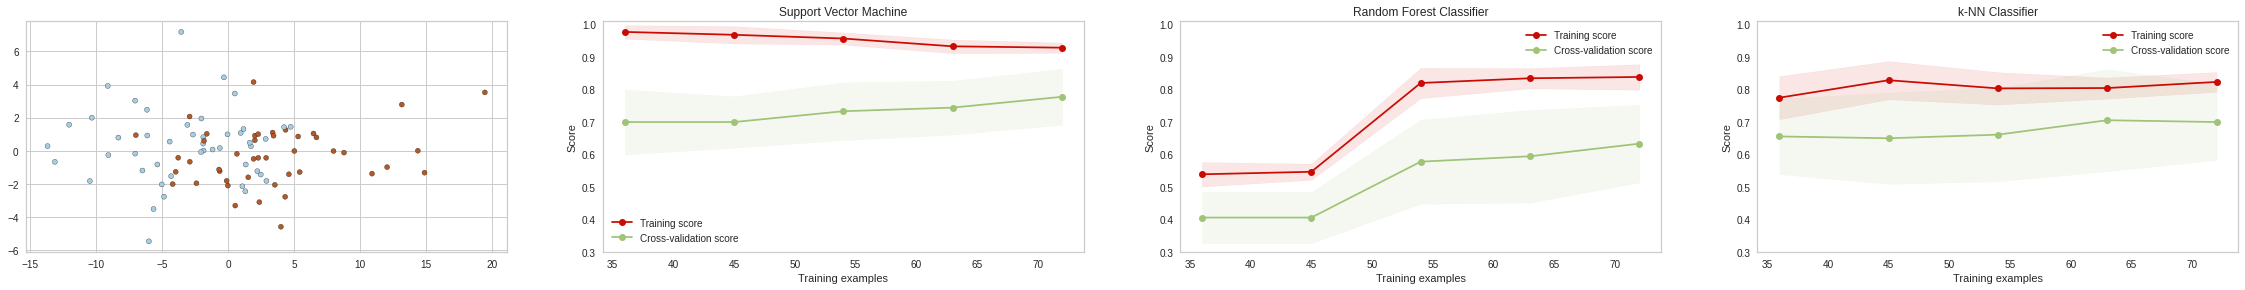

In [18]:
h = .02  # step size in the mesh

names = ["SVM", "Random Forest", "KNN"]


def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.5, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curves
    """

    axes.set_title(title)
    if ylim is not None:
      axes.set_ylim(*ylim)
      axes.set_xlabel("Training examples")
      axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")


    return plt

clsfs = [clf_svm, rfc, clf_knn]

# Create lists of datasets to loop over
df_lasso_2_train=np.array(df_lasso_2_train)

# First make plot without classifiers:
num = 0
fig = plt.figure(figsize=[50,50])
ax = fig.add_subplot(10, 5, num + 1)
ax.scatter(df_lasso_2_train[:,0], df_lasso_2_train[:,1], marker='o', c=y_train,s=25, edgecolor='k', cmap=plt.cm.Paired)
num += 1

# Create a cross-validation object
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
# Now use the classifiers on all datasets
for clf, i in zip(clsfs, range(3)):
    # Split data in training and testing
    titles = ['Support Vector Machine', 'Random Forest Classifier', 'k-NN Classifier']
    title = titles[i]
    ax = fig.add_subplot(10, 5, num + 1)
    plot_learning_curve(clf, title, df_lasso_2_train, y_train, ax, ylim=(0.3, 1.01), cv=cv)
    num += 1